# This project is for fun, To get you into your dream personality.

In [ ]:
!pip install diffusers
!pip install ip_adapter
!pip install insightface
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 56.7 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1054149 sha256=d5b614f7c52184aaae60955294af39f779b4b0c3beff30bd3dedd1e2fe0bf12a
  Stored in directory: /root/.cache/pip/wheels/e3/d0/80/e3773fb8b6d1cca87ea1d33d9b1f20a223a6493c896da249b5
Successfully built insightface


In [ ]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 719.8 kB/s eta 0:00:00


In [ ]:
import torch
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline, StableDiffusionInpaintPipelineLegacy, DDIMScheduler, AutoencoderKL
from PIL import Image
from insightface.app import FaceAnalysis
from ip_adapter import IPAdapterPlus
import cv2

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

# This is for Generating the face embedings



In [ ]:
app = FaceAnalysis(name="buffalo_l", providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

image = cv2.imread("person.jpg")
faces = app.get(image)

faceid_embeds = torch.from_numpy(faces[0].normed_embedding).unsqueeze(0)


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [ ]:
faceid_embeds

tensor([[ 5.9865e-02,  1.4361e-02, -3.0992e-02, -4.9019e-02,  6.5878e-02,
         -8.2111e-03,  4.0919e-02,  7.1133e-02,  3.1462e-02,  2.1695e-02,
          1.9775e-02,  8.7742e-02, -1.1379e-02, -4.3124e-02,  4.5248e-02,
          1.6897e-03, -3.7777e-02,  6.1424e-02,  4.4379e-04,  6.9206e-02,
          2.3338e-02,  5.5159e-02,  3.1412e-02,  3.4224e-03, -2.2668e-02,
         -7.9998e-02, -4.1665e-02, -1.9159e-02, -7.2755e-02, -4.9046e-03,
          4.9416e-02,  3.1487e-02, -4.4873e-03, -2.6843e-02, -7.2037e-02,
          2.4271e-02,  4.2538e-04,  3.2703e-02, -9.4153e-02,  2.6594e-02,
          1.5683e-02, -8.3466e-02, -4.8727e-02,  1.2929e-03, -3.7017e-02,
         -3.3571e-02, -1.9515e-02, -5.5279e-02,  2.8229e-02,  4.1976e-02,
          1.5891e-02,  2.7646e-03,  8.2639e-02,  2.0876e-02,  3.7321e-02,
         -2.0863e-02,  9.8867e-03, -9.6246e-03, -3.1592e-03,  3.6981e-02,
         -3.9706e-02, -7.9412e-02, -3.2793e-02,  6.5067e-02, -8.6377e-02,
         -3.7711e-02,  3.1396e-02,  8.

In [ ]:
from huggingface_hub import hf_hub_download

In [ ]:
base_model_path = "SG161222/Realistic_Vision_V4.0_noVAE"
vae_model_path = "stabilityai/sd-vae-ft-mse"
image_encoder_path = "laion/CLIP-ViT-H-14-laion2B-s32B-b79K"
ip_ckpt = hf_hub_download(repo_id="h94/IP-Adapter-FaceID", filename="ip-adapter-faceid_sd15.bin", repo_type="model")
device="cuda"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


ip-adapter-faceid_sd15.bin:   0%|          | 0.00/96.7M [00:00<?, ?B/s]

In [ ]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

noise_scheduler = DDIMScheduler(
    num_train_timesteps=1000,
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
    steps_offset=1,
)
vae = AutoencoderKL.from_pretrained(vae_model_path).to(dtype=torch.float16)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

In [ ]:
# load SD pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    vae=vae,
    feature_extractor=None,
    safety_checker=None
)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

# Loading the Instance of the model



In [ ]:
from ip_adapter.ip_adapter_faceid import IPAdapterFaceID

In [ ]:
# load ip-adapter
ip_model = IPAdapterFaceID(pipe ,ip_ckpt, device)

/usr/local/lib/python3.10/dist-packages/diffusers/models/lora.py:208: FutureWarning: `LoRALinearLayer` is deprecated and will be removed in version 1.0.0. Use of `LoRALinearLayer` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRALinearLayer", "1.0.0", deprecation_message)


  0%|          | 0/100 [00:00<?, ?it/s]

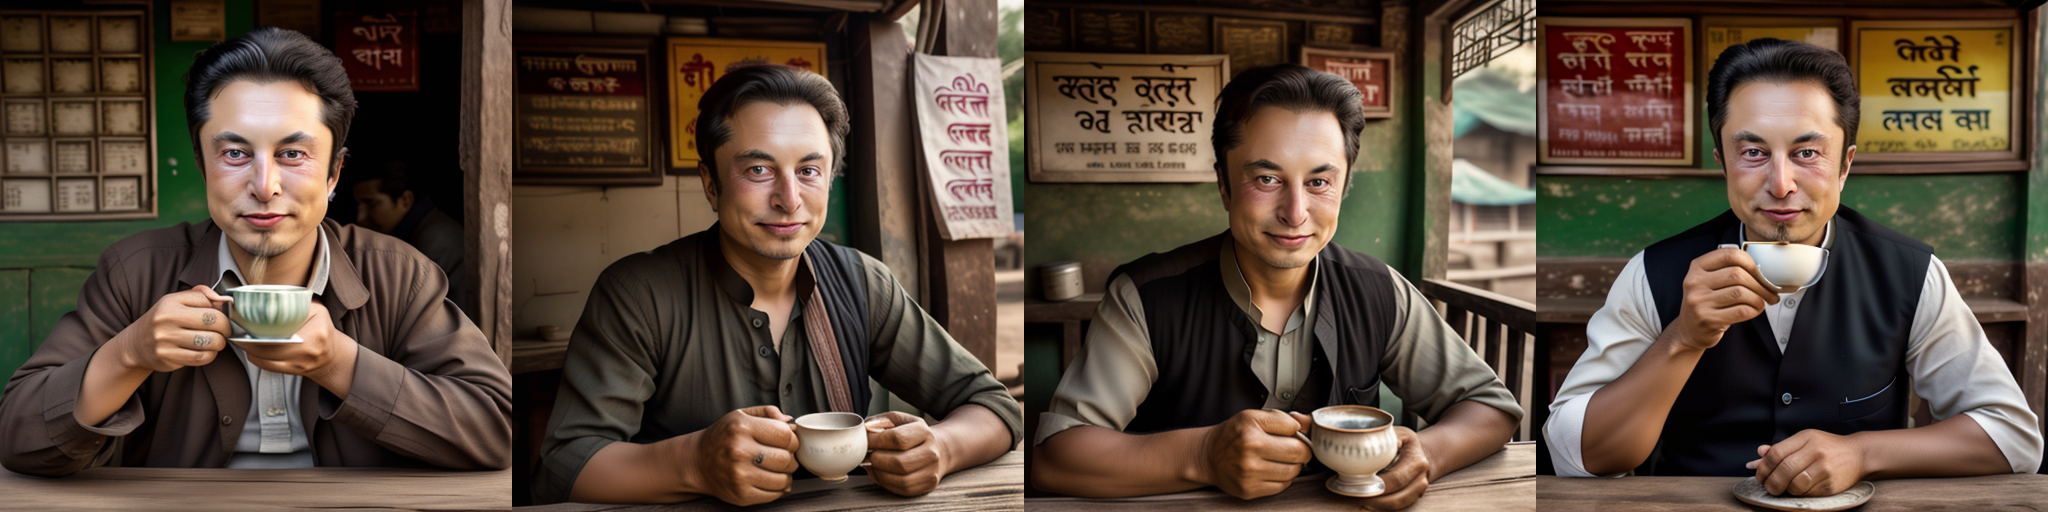

In [ ]:
prompt="photo of a man in India drinking tea at a tea stall,realistic , clear face"
negative_prompt="low quality,blur image"
images = ip_model.generate(faceid_embeds, prompt=prompt, negative_prompt=negative_prompt,num_samples=4,seed=480, num_inference_steps=100)
grid = image_grid(images, 1, 4)
grid